In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from  datasist.structdata import detect_outliers
import matplotlib.pyplot as plt

df = pd.read_csv ('games_data.csv', encoding = 'unicode_escape', engine ='python')




In [2]:
df

id                              title release_date  \
0          0   Counter-Strike: Global Offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: Darktide          NaN   
3          3  Call of Duty®: Modern Warfare® II          NaN   
4          4                      Apex Legends          NaN   
...      ...                                ...          ...   
73340  73339                   Pirate Commander          NaN   
73341  73340                       Fairy Bubble          NaN   
73342  73341                    Criminal Russia          NaN   
73343  73342                     Carmine Impact          NaN   
73344  73343              Artifice: War Tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
73340                              NaN       NaN   
73341                              NaN       NaN   
73342                              NaN       NaN   
73343                              NaN       NaN   
73344                              NaN       NaN   

                             genres  \
0               Action;Free to Play   
1      Action;Free to Play;Strategy   
2                               NaN   
3                               NaN   
4                               NaN   
...                             ...   
73340                           NaN   
73341                           NaN   
73342                           NaN   
73343                           NaN   
73344                           NaN   

                             multiplayer_or_singleplayer         price  \
0      Multi-player;Steam Achievements;Full controlle...  Free to play   
1      Multi-player;Co-op;Steam Trading Cards;Steam W...  Free to play   
2                                                    NaN         2,199   
3                                                    NaN         4,999   
4                                                    NaN  Free to play   
...                                                  ...           ...   
73340                                                NaN  Free to play   
73341                                                NaN           219   
73342                                                NaN  Free to play   
73343                                                NaN  Free to play   
73344                                                NaN  Free to play   

           dc_price overall_review  detailed_review  reviews percent_positive  \
0      Free to play       Positive    Very Positive  6774812              88%   
1      Free to play       Positive    Very Positive  1885261              82%   
2             2,199       Positive  Mostly Positive    26092              72%   
3             4,999          Mixed            Mixed   215969              64%   
4      Free to play       Positive    Very Positive   539297              85%   
...             ...            ...              ...      ...              ...   
73340  Free to play            NaN              NaN      NaN              NaN   
73341           219            NaN              NaN      NaN              NaN   
73342  Free to play            NaN              NaN      NaN              NaN   
73343  Free to play            NaN              NaN      NaN              NaN   
73344  Free to play            NaN              NaN      NaN              NaN   

      win_support  mac_support  lin_support  
0               1          1.0          1.0  
1               1          1.0          1.0  
2               1          0.0          0.0  
3               1          0.0          0.0  
4               1          0.0          0.0  
...      

In [3]:
mask = df.isnull().any(axis=1)
sum_of_rows_with_nan= mask.sum()
total_num_of_rows=len(df)
sum_of_rows_with_nan/total_num_of_rows


0.766255368464108

In [4]:
#there are many missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73345 entries, 0 to 73344
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73341 non-null  object 
 1   title                        73341 non-null  object 
 2   release_date                 23281 non-null  object 
 3   developer                    23281 non-null  object 
 4   publisher                    23281 non-null  object 
 5   genres                       23281 non-null  object 
 6   multiplayer_or_singleplayer  23281 non-null  object 
 7   price                        73340 non-null  object 
 8   dc_price                     73340 non-null  object 
 9   overall_review               36875 non-null  object 
 10  detailed_review              36865 non-null  object 
 11  reviews                      36865 non-null  object 
 12  percent_positive             36865 non-null  object 
 13  win_support     

# Data Cleaning

#1_fix_title

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73345 entries, 0 to 73344
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73341 non-null  object 
 1   title                        73341 non-null  object 
 2   release_date                 23281 non-null  object 
 3   developer                    23281 non-null  object 
 4   publisher                    23281 non-null  object 
 5   genres                       23281 non-null  object 
 6   multiplayer_or_singleplayer  23281 non-null  object 
 7   price                        73340 non-null  object 
 8   dc_price                     73340 non-null  object 
 9   overall_review               36875 non-null  object 
 10  detailed_review              36865 non-null  object 
 11  reviews                      36865 non-null  object 
 12  percent_positive             36865 non-null  object 
 13  win_support     

In [7]:
df['title'] = df['title'].str.capitalize()

In [8]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
73340  73339                   Pirate commander          NaN   
73341  73340                       Fairy bubble          NaN   
73342  73341                    Criminal russia          NaN   
73343  73342                     Carmine impact          NaN   
73344  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
73340                              NaN       NaN   
73341                              NaN       NaN   
73342                              NaN       NaN   
73343                              NaN       NaN   
73344                              NaN       NaN   

                             genres  \
0               Action;Free to Play   
1      Action;Free to Play;Strategy   
2                               NaN   
3                               NaN   
4                               NaN   
...                             ...   
73340                           NaN   
73341                           NaN   
73342                           NaN   
73343                           NaN   
73344                           NaN   

                             multiplayer_or_singleplayer         price  \
0      Multi-player;Steam Achievements;Full controlle...  Free to play   
1      Multi-player;Co-op;Steam Trading Cards;Steam W...  Free to play   
2                                                    NaN         2,199   
3                                                    NaN         4,999   
4                                                    NaN  Free to play   
...                                                  ...           ...   
73340                                                NaN  Free to play   
73341                                                NaN           219   
73342                                                NaN  Free to play   
73343                                                NaN  Free to play   
73344                                                NaN  Free to play   

           dc_price overall_review  detailed_review  reviews percent_positive  \
0      Free to play       Positive    Very Positive  6774812              88%   
1      Free to play       Positive    Very Positive  1885261              82%   
2             2,199       Positive  Mostly Positive    26092              72%   
3             4,999          Mixed            Mixed   215969              64%   
4      Free to play       Positive    Very Positive   539297              85%   
...             ...            ...              ...      ...              ...   
73340  Free to play            NaN              NaN      NaN              NaN   
73341           219            NaN              NaN      NaN              NaN   
73342  Free to play            NaN              NaN      NaN              NaN   
73343  Free to play            NaN              NaN      NaN              NaN   
73344  Free to play            NaN              NaN      NaN              NaN   

      win_support  mac_support  lin_support  
0               1          1.0          1.0  
1               1          1.0          1.0  
2               1          0.0          0.0  
3               1          0.0          0.0  
4               1          0.0          0.0  
...      

In [9]:
num_nan = df['title'].isna().sum()

print(f'The number of NaN values in the title is {num_nan}.')

The number of NaN values in the title is 4.


In [10]:
df = df.dropna(subset=['title'])

In [11]:
num_nan = df['title'].isna().sum()

print(f'The number of NaN values in the title is {num_nan}.')

The number of NaN values in the title is 0.


In [12]:
for title in df['title'].unique():
    print(title)

Counter-strike: global offensive
Dota 2
Warhammer 40,000: darktide
Call of duty®: modern warfare® ii
Apex legends
Pubg: battlegrounds
Naraka: bladepoint
Dead by daylight
Warframe
War thunder
Ea sports fifa 23
Grand theft auto v
Football manager 2023
Elden ring
The elder scrolls® online
Destiny 2
Rimworld
Rust
Euro truck simulator 2
Undecember
God of war
New world
Marvels spider-man: miles morales
Tom clancy's rainbow six® siege
Yu-gi-oh! master duel
Final fantasy xiv online
Ready or not
Cities: skylines
Nba 2k23
The sims 4
Forza horizon 5
Project zomboid
Team fortress 2
Grounded
Sea of thieves
Farming simulator 22
World of warships
Raft
Victoria 3
Phasmophobia
Sonic frontiers
Monster hunter rise
American truck simulator
Marvel snap
No man's sky
Fallout 76: the pitt
Cyberpunk 2077
The forest
Sid meiers civilization® vi
Persona 5 royal
Microsoft flight simulator 40th anniversary edition
Warhammer 40,000: inquisitor - martyr
Red dead redemption 2
Valheim
Zero sievert
Stellaris
The el

Card survival: tropical island - the first days
Nox timore remake
Half-life deathmatch: source
Brainbread 2
Sometimes: success requires sacrifice
Faceted flight
Air brawl
My paper boat
Trials on tatooine
Multiwinia + darwinia
Darwinia + soundtrack
The bionic commando pack
The tale of tales collection
Kranx complete pack
A.r.e.s. complete edition
Demolition inc. + level and weapon dlc bundle
Galactic civilizations i and ii pack
Scary buddies
Super totally ultimate dad showdown
Eos
Synthbiotic dungeon
Metamorphos
2236 a.d. secretary stories
Project grove: prologue
Truck mechanic: dangerous paths - prologue
Aces in the dust
Virtual becomes reality: a stanford vr experience
Jelly brawl: classic
12 bananas
Penimorta
Farm manager 2021: prologue
Evergate: ki's awakening
Revolvr 3
Lawyer guy: defender of justice
Battle arena vr
Meridian 157: prologue
Plokoth
Rog citadel xv
Aircraft carrier survival: tutorial
Jack axe: the trial
Tomorrow
Take the dream ix
Antenna
Skeet: vr target shooting
Virzo

In [13]:
df = df[df['title'].str[0].str.isalpha()]

df = df.reset_index(drop=True)

In [14]:
for title in df['title'].unique():
    print(title)

Counter-strike: global offensive
Dota 2
Warhammer 40,000: darktide
Call of duty®: modern warfare® ii
Apex legends
Pubg: battlegrounds
Naraka: bladepoint
Dead by daylight
Warframe
War thunder
Ea sports fifa 23
Grand theft auto v
Football manager 2023
Elden ring
The elder scrolls® online
Destiny 2
Rimworld
Rust
Euro truck simulator 2
Undecember
God of war
New world
Marvels spider-man: miles morales
Tom clancy's rainbow six® siege
Yu-gi-oh! master duel
Final fantasy xiv online
Ready or not
Cities: skylines
Nba 2k23
The sims 4
Forza horizon 5
Project zomboid
Team fortress 2
Grounded
Sea of thieves
Farming simulator 22
World of warships
Raft
Victoria 3
Phasmophobia
Sonic frontiers
Monster hunter rise
American truck simulator
Marvel snap
No man's sky
Fallout 76: the pitt
Cyberpunk 2077
The forest
Sid meiers civilization® vi
Persona 5 royal
Microsoft flight simulator 40th anniversary edition
Warhammer 40,000: inquisitor - martyr
Red dead redemption 2
Valheim
Zero sievert
Stellaris
The el

Graviter
Zero spring episode 3
Robot labs remake
Koshmar
Foglight
Speakerman
Repairbot
Unshaded
Levenium
I'm late
Furries & scalies: super scary halloween spooky times
Bomb fight
Galactic story
Desperate times
Game developer simulator
Gokart - newmexico
Sheep collision
Miss you
Planet nine
Chessboard kingdoms
The fish
Exit 3 - painter
Ultimate starfighter
Starzine
Galaxy warfighter
Heavenly hammer
Look and find - curiosity
Forex demo accelerator
Amaze gears 2
Battlestation
Tactical operations force
Chop
Safe climbing
Battle of tanks
The voice in the void
Infected prison
Tank hurricane
Eyes of darkness
Tengutana
Aspen: uncanny home
Runes of avalon - path of magic
Terra bomber
Snares of ruin 2
The great jitters: pudding panic
Doomsday on demand 2
Survival denied
Ww2 zombie range vr
S.o.r.s
Strike force: arctic storm
Extreme race
Super space towers
Shufflepoker
Chainman
Once upon a time in morocco
Crazy world
Stream games deluxe
Isle of the dead
Skater cally
Hatchpunk
Prince ajapanadam x 

#2_fix_multiplayer_or_singleplayer

In [15]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres  \
0               Action;Free to Play   
1      Action;Free to Play;Strategy   
2                               NaN   
3                               NaN   
4                               NaN   
...                             ...   
71940                           NaN   
71941                           NaN   
71942                           NaN   
71943                           NaN   
71944                           NaN   

                             multiplayer_or_singleplayer         price  \
0      Multi-player;Steam Achievements;Full controlle...  Free to play   
1      Multi-player;Co-op;Steam Trading Cards;Steam W...  Free to play   
2                                                    NaN         2,199   
3                                                    NaN         4,999   
4                                                    NaN  Free to play   
...                                                  ...           ...   
71940                                                NaN  Free to play   
71941                                                NaN           219   
71942                                                NaN  Free to play   
71943                                                NaN  Free to play   
71944                                                NaN  Free to play   

           dc_price overall_review  detailed_review  reviews percent_positive  \
0      Free to play       Positive    Very Positive  6774812              88%   
1      Free to play       Positive    Very Positive  1885261              82%   
2             2,199       Positive  Mostly Positive    26092              72%   
3             4,999          Mixed            Mixed   215969              64%   
4      Free to play       Positive    Very Positive   539297              85%   
...             ...            ...              ...      ...              ...   
71940  Free to play            NaN              NaN      NaN              NaN   
71941           219            NaN              NaN      NaN              NaN   
71942  Free to play            NaN              NaN      NaN              NaN   
71943  Free to play            NaN              NaN      NaN              NaN   
71944  Free to play            NaN              NaN      NaN              NaN   

      win_support  mac_support  lin_support  
0               1          1.0          1.0  
1               1          1.0          1.0  
2               1          0.0          0.0  
3               1          0.0          0.0  
4               1          0.0          0.0  
...      

In [16]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres  \
0               Action;Free to Play   
1      Action;Free to Play;Strategy   
2                               NaN   
3                               NaN   
4                               NaN   
...                             ...   
71940                           NaN   
71941                           NaN   
71942                           NaN   
71943                           NaN   
71944                           NaN   

                             multiplayer_or_singleplayer         price  \
0      Multi-player;Steam Achievements;Full controlle...  Free to play   
1      Multi-player;Co-op;Steam Trading Cards;Steam W...  Free to play   
2                                                    NaN         2,199   
3                                                    NaN         4,999   
4                                                    NaN  Free to play   
...                                                  ...           ...   
71940                                                NaN  Free to play   
71941                                                NaN           219   
71942                                                NaN  Free to play   
71943                                                NaN  Free to play   
71944                                                NaN  Free to play   

           dc_price overall_review  detailed_review  reviews percent_positive  \
0      Free to play       Positive    Very Positive  6774812              88%   
1      Free to play       Positive    Very Positive  1885261              82%   
2             2,199       Positive  Mostly Positive    26092              72%   
3             4,999          Mixed            Mixed   215969              64%   
4      Free to play       Positive    Very Positive   539297              85%   
...             ...            ...              ...      ...              ...   
71940  Free to play            NaN              NaN      NaN              NaN   
71941           219            NaN              NaN      NaN              NaN   
71942  Free to play            NaN              NaN      NaN              NaN   
71943  Free to play            NaN              NaN      NaN              NaN   
71944  Free to play            NaN              NaN      NaN              NaN   

      win_support  mac_support  lin_support  
0               1          1.0          1.0  
1               1          1.0          1.0  
2               1          0.0          0.0  
3               1          0.0          0.0  
4               1          0.0          0.0  
...      

In [17]:
df['multiplayer_or_singleplayer'] = df['multiplayer_or_singleplayer'].astype(str).apply(lambda x: ' '.join([i for i in x.split() if i in ('Single-player', 'Multi-player')]))

In [18]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres multiplayer_or_singleplayer         price  \
0               Action;Free to Play                              Free to play   
1      Action;Free to Play;Strategy                              Free to play   
2                               NaN                                     2,199   
3                               NaN                                     4,999   
4                               NaN                              Free to play   
...                             ...                         ...           ...   
71940                           NaN                              Free to play   
71941                           NaN                                       219   
71942                           NaN                              Free to play   
71943                           NaN                              Free to play   
71944                           NaN                              Free to play   

           dc_price overall_review  detailed_review  reviews percent_positive  \
0      Free to play       Positive    Very Positive  6774812              88%   
1      Free to play       Positive    Very Positive  1885261              82%   
2             2,199       Positive  Mostly Positive    26092              72%   
3             4,999          Mixed            Mixed   215969              64%   
4      Free to play       Positive    Very Positive   539297              85%   
...             ...            ...              ...      ...              ...   
71940  Free to play            NaN              NaN      NaN              NaN   
71941           219            NaN              NaN      NaN              NaN   
71942  Free to play            NaN              NaN      NaN              NaN   
71943  Free to play            NaN              NaN      NaN              NaN   
71944  Free to play            NaN              NaN      NaN              NaN   

      win_support  mac_support  lin_support  
0               1          1.0          1.0  
1               1          1.0          1.0  
2               1          0.0          0.0  
3               1          0.0          0.0  
4               1          0.0          0.0  
...           ...          ...          ...  
71940           1          0.0          0.0  
71941           1          0.0          0.0  
71942           1          0.0          1.0  
71943           1          0.0          0.0  
71944           1          0.0          0.0  

[71945 rows x 16 columns]

In [19]:
df.drop('multiplayer_or_singleplayer', axis=1, inplace=True)#

In [20]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%           1   
1           Positive    Very Positive  1885261              82%           1   
2           Positive  Mostly Positive    26092              72%           1   
3              Mixed            Mixed   215969              64%           1   
4           Positive    Very Positive   539297              85%           1   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN           1   
71941            NaN              NaN      NaN              NaN           1   
71942            NaN              NaN      NaN              NaN           1   
71943            NaN              NaN      NaN              NaN           1   
71944            NaN              NaN      NaN              NaN           1   

       mac_support  lin_support  
0              1.0          1.0  
1              1.0          1.0  
2              0.0          0.0  
3              0.0          0.0  
4              0.0          0.0  
...            ...          ...  
71940          0.0          0.0  
71941          0.0          0.0  
71942          0.0          1.0  
71943          0.0          0.0  
71944          0.0          0.0  

[71945 rows x 15 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  object 
 7   dc_price          71944 non-null  object 
 8   overall_review    36124 non-null  object 
 9   detailed_review   36125 non-null  object 
 10  reviews           36125 non-null  object 
 11  percent_positive  36125 non-null  object 
 12  win_support       71944 non-null  object 
 13  mac_support       71944 non-null  float64
 14  lin_support       71944 non-null  float64
dtypes: float64(2), object(13)
memory usage: 8.2+ MB


#3_Fix_win_support

In [22]:
df.loc[:, 'win_support'] = df['win_support'].astype(str)
df.loc[:, 'win_support'] = df['win_support'].replace({'1': 'Yes', '0': 'No', '79%' : 'No', 'nan': 'No' , 'None' : 'No'})

In [23]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

       mac_support  lin_support  
0              1.0          1.0  
1              1.0          1.0  
2              0.0          0.0  
3              0.0          0.0  
4              0.0          0.0  
...            ...          ...  
71940          0.0          0.0  
71941          0.0          0.0  
71942          0.0          1.0  
71943          0.0          0.0  
71944          0.0          0.0  

[71945 rows x 15 columns]

In [24]:
print(df["win_support"].unique())

['Yes' 'No']


In [25]:
df["win_support"].isna().sum()

0

#4_Fix_mac_support

In [26]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

       mac_support  lin_support  
0              1.0          1.0  
1              1.0          1.0  
2              0.0          0.0  
3              0.0          0.0  
4              0.0          0.0  
...            ...          ...  
71940          0.0          0.0  
71941          0.0          0.0  
71942          0.0          1.0  
71943          0.0          0.0  
71944          0.0          0.0  

[71945 rows x 15 columns]

In [27]:
df_copy = df.copy()

df_copy.loc[:, 'mac_support'] = df_copy['mac_support'].astype(str)
df_copy.loc[:, 'mac_support'] = df_copy['mac_support'].replace({'1.0': 'Yes', '0.0': 'No'})

In [28]:
df_copy

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

      mac_support  lin_support  
0             Yes          1.0  
1             Yes          1.0  
2              No          0.0  
3              No          0.0  
4              No          0.0  
...           ...          ...  
71940          No          0.0  
71941          No          0.0  
71942          No          1.0  
71943          No          0.0  
71944          No          0.0  

[71945 rows x 15 columns]

In [29]:
df = df_copy

In [30]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

      mac_support  lin_support  
0             Yes          1.0  
1             Yes          1.0  
2              No          0.0  
3              No          0.0  
4              No          0.0  
...           ...          ...  
71940          No          0.0  
71941          No          0.0  
71942          No          1.0  
71943          No          0.0  
71944          No          0.0  

[71945 rows x 15 columns]

In [31]:
print(df["mac_support"].unique())

['Yes' 'No' 'nan']


#4_Fix_lin_support

In [32]:
df = df.copy()

df_copy.loc[:, 'lin_support'] = df_copy['lin_support'].astype(str)
df_copy.loc[:, 'lin_support'] = df_copy['lin_support'].replace({'1.0': 'Yes', '0.0': 'No' , 'nan' : 'No'})

In [33]:
df_copy

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

      mac_support lin_support  
0             Yes         Yes  
1             Yes         Yes  
2              No          No  
3              No          No  
4              No          No  
...           ...         ...  
71940          No          No  
71941          No          No  
71942          No         Yes  
71943          No          No  
71944          No          No  

[71945 rows x 15 columns]

In [34]:
df = df_copy

In [35]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres         price      dc_price  \
0               Action;Free to Play  Free to play  Free to play   
1      Action;Free to Play;Strategy  Free to play  Free to play   
2                               NaN         2,199         2,199   
3                               NaN         4,999         4,999   
4                               NaN  Free to play  Free to play   
...                             ...           ...           ...   
71940                           NaN  Free to play  Free to play   
71941                           NaN           219           219   
71942                           NaN  Free to play  Free to play   
71943                           NaN  Free to play  Free to play   
71944                           NaN  Free to play  Free to play   

      overall_review  detailed_review  reviews percent_positive win_support  \
0           Positive    Very Positive  6774812              88%         Yes   
1           Positive    Very Positive  1885261              82%         Yes   
2           Positive  Mostly Positive    26092              72%         Yes   
3              Mixed            Mixed   215969              64%         Yes   
4           Positive    Very Positive   539297              85%         Yes   
...              ...              ...      ...              ...         ...   
71940            NaN              NaN      NaN              NaN         Yes   
71941            NaN              NaN      NaN              NaN         Yes   
71942            NaN              NaN      NaN              NaN         Yes   
71943            NaN              NaN      NaN              NaN         Yes   
71944            NaN              NaN      NaN              NaN         Yes   

      mac_support lin_support  
0             Yes         Yes  
1             Yes         Yes  
2              No          No  
3              No          No  
4              No          No  
...           ...         ...  
71940          No          No  
71941          No          No  
71942          No         Yes  
71943          No          No  
71944          No          No  

[71945 rows x 15 columns]

In [36]:
print(df["lin_support"].unique())

['Yes' 'No']


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                71945 non-null  object
 1   title             71945 non-null  object
 2   release_date      23029 non-null  object
 3   developer         23029 non-null  object
 4   publisher         23029 non-null  object
 5   genres            23029 non-null  object
 6   price             71944 non-null  object
 7   dc_price          71944 non-null  object
 8   overall_review    36124 non-null  object
 9   detailed_review   36125 non-null  object
 10  reviews           36125 non-null  object
 11  percent_positive  36125 non-null  object
 12  win_support       71945 non-null  object
 13  mac_support       71945 non-null  object
 14  lin_support       71945 non-null  object
dtypes: object(15)
memory usage: 8.2+ MB


#5_Fix_reviews

In [38]:
df['reviews']=pd.to_numeric(df['reviews'],errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  object 
 7   dc_price          71944 non-null  object 
 8   overall_review    36124 non-null  object 
 9   detailed_review   36125 non-null  object 
 10  reviews           36125 non-null  float64
 11  percent_positive  36125 non-null  object 
 12  win_support       71945 non-null  object 
 13  mac_support       71945 non-null  object 
 14  lin_support       71945 non-null  object 
dtypes: float64(1), object(14)
memory usage: 8.2+ MB


#6_Fix_price

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  object 
 7   dc_price          71944 non-null  object 
 8   overall_review    36124 non-null  object 
 9   detailed_review   36125 non-null  object 
 10  reviews           36125 non-null  float64
 11  percent_positive  36125 non-null  object 
 12  win_support       71945 non-null  object 
 13  mac_support       71945 non-null  object 
 14  lin_support       71945 non-null  object 
dtypes: float64(1), object(14)
memory usage: 8.2+ MB


In [41]:
for price in df['price'].unique():
    print(price)

Free to play
2,199
4,999
1,199
749
3,499
3,199
2,499
1,599
1,099
1,799
925
3,299
1,499
999
719
1,299
899
529
2,699
565
2,479
439
2,399
2,999
3,490
3,999
1,669
880
1,999
759
479
3,399
369
699
459
799
569
2,799
1,399
995
199
480
399
2,149
865
800
1,000
2,497
2,249
869
1,349
4,799
249
2,599
619
2,299
989
499
629
690
1,888
1,600
2,990
2,400
789
598
419
1,980
1,075
2,449
300
1,899
939
1,749
1,300
4,299
3,284
1,490
1,139
1,800
739
579
1,149
599
709
1,225
729
950
2,500
3,599
1,129
2,339
849
1,968
379
349
3,799
180
2,374
1,330
2,970
1,819
959
239
2,000
1,039
810
1,200
570
1,489
1,440
679
785
1,009
1,132
165
299
1,213
219
1,699
2,700
563
1,500
2,099
259
580
489
769
474
1,960
2,750
649
359
559
1,179
628
125
646
596
2,627
2,029
260
929
1,245
1,289
450
3,325
670
2,646
610
2,490
530
3,000
250
1,211
717
350
2,049
1,100
429
549
329
2,600
1,272
1,990
1,459
1,106
1,649
1,879
850
582
6,749
750
464
600
319
550
449
1,949
400
2,234
4,250
2,924
99
1,169
412
1,079
969
3,330
519
229
555
2,855
675
169
650
127


In [42]:
df['price'] = df['price'].replace(',', '', regex=True).replace('[^0-9\.]', '', regex=True).replace('', 0.0).astype(float)

In [43]:
for price in df['price'].unique():
    print(price)

0.0
2199.0
4999.0
1199.0
749.0
3499.0
3199.0
2499.0
1599.0
1099.0
1799.0
925.0
3299.0
1499.0
999.0
719.0
1299.0
899.0
529.0
2699.0
565.0
2479.0
439.0
2399.0
2999.0
3490.0
3999.0
1669.0
880.0
1999.0
759.0
479.0
3399.0
369.0
699.0
459.0
799.0
569.0
2799.0
1399.0
995.0
199.0
480.0
399.0
2149.0
865.0
800.0
1000.0
2497.0
2249.0
869.0
1349.0
4799.0
249.0
2599.0
619.0
2299.0
989.0
499.0
629.0
690.0
1888.0
1600.0
2990.0
2400.0
789.0
598.0
419.0
1980.0
1075.0
2449.0
300.0
1899.0
939.0
1749.0
1300.0
4299.0
3284.0
1490.0
1139.0
1800.0
739.0
579.0
1149.0
599.0
709.0
1225.0
729.0
950.0
2500.0
3599.0
1129.0
2339.0
849.0
1968.0
379.0
349.0
3799.0
180.0
2374.0
1330.0
2970.0
1819.0
959.0
239.0
2000.0
1039.0
810.0
1200.0
570.0
1489.0
1440.0
679.0
785.0
1009.0
1132.0
165.0
299.0
1213.0
219.0
1699.0
2700.0
563.0
1500.0
2099.0
259.0
580.0
489.0
769.0
474.0
1960.0
2750.0
649.0
359.0
559.0
1179.0
628.0
125.0
646.0
596.0
2627.0
2029.0
260.0
929.0
1245.0
1289.0
450.0
3325.0
670.0
2646.0
610.0
2490.0
530.0
3000

In [44]:
df.drop('dc_price', axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  float64
 7   overall_review    36124 non-null  object 
 8   detailed_review   36125 non-null  object 
 9   reviews           36125 non-null  float64
 10  percent_positive  36125 non-null  object 
 11  win_support       71945 non-null  object 
 12  mac_support       71945 non-null  object 
 13  lin_support       71945 non-null  object 
dtypes: float64(2), object(12)
memory usage: 7.7+ MB


In [46]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres   price overall_review  detailed_review  \
0               Action;Free to Play     0.0       Positive    Very Positive   
1      Action;Free to Play;Strategy     0.0       Positive    Very Positive   
2                               NaN  2199.0       Positive  Mostly Positive   
3                               NaN  4999.0          Mixed            Mixed   
4                               NaN     0.0       Positive    Very Positive   
...                             ...     ...            ...              ...   
71940                           NaN     0.0            NaN              NaN   
71941                           NaN   219.0            NaN              NaN   
71942                           NaN     0.0            NaN              NaN   
71943                           NaN     0.0            NaN              NaN   
71944                           NaN     0.0            NaN              NaN   

         reviews percent_positive win_support mac_support lin_support  
0      6774812.0              88%         Yes         Yes         Yes  
1      1885261.0              82%         Yes         Yes         Yes  
2        26092.0              72%         Yes          No          No  
3       215969.0              64%         Yes          No          No  
4       539297.0              85%         Yes          No          No  
...          ...              ...         ...         ...         ...  
71940        NaN              NaN         Yes          No          No  
71941        NaN              NaN         Yes          No          No  
71942        NaN              NaN         Yes          No         Yes  
71943        NaN              NaN         Yes          No          No  
71944        NaN              NaN         Yes          No          No  

[71945 rows x 14 columns]

In [47]:
 df = df.loc[:, ~df.columns.duplicated()]

In [48]:
df

id                              title release_date  \
0          0   Counter-strike: global offensive   2012-08-21   
1          1                             Dota 2   2013-07-09   
2          2         Warhammer 40,000: darktide          NaN   
3          3  Call of duty®: modern warfare® ii          NaN   
4          4                      Apex legends          NaN   
...      ...                                ...          ...   
71940  73339                   Pirate commander          NaN   
71941  73340                       Fairy bubble          NaN   
71942  73341                    Criminal russia          NaN   
71943  73342                     Carmine impact          NaN   
71944  73343              Artifice: war tactics          NaN   

                             developer publisher  \
0      Valve;Hidden Path Entertainment     Valve   
1                                Valve     Valve   
2                                  NaN       NaN   
3                                  NaN       NaN   
4                                  NaN       NaN   
...                                ...       ...   
71940                              NaN       NaN   
71941                              NaN       NaN   
71942                              NaN       NaN   
71943                              NaN       NaN   
71944                              NaN       NaN   

                             genres   price overall_review  detailed_review  \
0               Action;Free to Play     0.0       Positive    Very Positive   
1      Action;Free to Play;Strategy     0.0       Positive    Very Positive   
2                               NaN  2199.0       Positive  Mostly Positive   
3                               NaN  4999.0          Mixed            Mixed   
4                               NaN     0.0       Positive    Very Positive   
...                             ...     ...            ...              ...   
71940                           NaN     0.0            NaN              NaN   
71941                           NaN   219.0            NaN              NaN   
71942                           NaN     0.0            NaN              NaN   
71943                           NaN     0.0            NaN              NaN   
71944                           NaN     0.0            NaN              NaN   

         reviews percent_positive win_support mac_support lin_support  
0      6774812.0              88%         Yes         Yes         Yes  
1      1885261.0              82%         Yes         Yes         Yes  
2        26092.0              72%         Yes          No          No  
3       215969.0              64%         Yes          No          No  
4       539297.0              85%         Yes          No          No  
...          ...              ...         ...         ...         ...  
71940        NaN              NaN         Yes          No          No  
71941        NaN              NaN         Yes          No          No  
71942        NaN              NaN         Yes          No         Yes  
71943        NaN              NaN         Yes          No          No  
71944        NaN              NaN         Yes          No          No  

[71945 rows x 14 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  float64
 7   overall_review    36124 non-null  object 
 8   detailed_review   36125 non-null  object 
 9   reviews           36125 non-null  float64
 10  percent_positive  36125 non-null  object 
 11  win_support       71945 non-null  object 
 12  mac_support       71945 non-null  object 
 13  lin_support       71945 non-null  object 
dtypes: float64(2), object(12)
memory usage: 7.7+ MB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   release_date      23029 non-null  object 
 3   developer         23029 non-null  object 
 4   publisher         23029 non-null  object 
 5   genres            23029 non-null  object 
 6   price             71944 non-null  float64
 7   overall_review    36124 non-null  object 
 8   detailed_review   36125 non-null  object 
 9   reviews           36125 non-null  float64
 10  percent_positive  36125 non-null  object 
 11  win_support       71945 non-null  object 
 12  mac_support       71945 non-null  object 
 13  lin_support       71945 non-null  object 
dtypes: float64(2), object(12)
memory usage: 7.7+ MB


#7_Fix_genres

In [51]:
for genres in df['genres'].unique():
    print(genres)

Action;Free to Play
Action;Free to Play;Strategy
nan
Action
Action;Free to Play;Massively Multiplayer;Simulation
Action;Adventure
Massively Multiplayer;RPG
Indie;Simulation;Strategy
Action;Adventure;Indie;Massively Multiplayer;RPG
Indie;Simulation
Simulation;Strategy
Indie;RPG;Simulation;Early Access
Adventure;Indie;Simulation;Early Access
Action;Adventure;Indie;Simulation
Strategy
Action;Adventure;Indie;RPG
RPG
Adventure;Simulation;Sports
Action;Adventure;Indie;Massively Multiplayer;Early Access
Indie;RPG;Simulation
Action;Indie;Early Access
Adventure;Indie;Simulation
Racing;Simulation;Early Access
Action;Adventure;Massively Multiplayer
Action;Simulation
Indie;Racing;Simulation;Sports
Action;RPG
Action;Strategy
Action;Adventure;Massively Multiplayer;RPG;Simulation;Strategy
Casual;Indie;Simulation;Strategy;Early Access
Action;Indie;Strategy;Early Access
Action;Adventure;RPG
Indie;Early Access
Action;Simulation;Strategy
Casual
Adventure;Casual;Free to Play;Massively Multiplayer;Simulati

In [52]:
df['genres'] = df['genres'].astype(str)
def lower(c):
    return c.lower()

df['genres']=df['genres'].apply(lower)

In [53]:
for genres in df['genres'].unique():
    print(genres)

action;free to play
action;free to play;strategy
nan
action
action;free to play;massively multiplayer;simulation
action;adventure
massively multiplayer;rpg
indie;simulation;strategy
action;adventure;indie;massively multiplayer;rpg
indie;simulation
simulation;strategy
indie;rpg;simulation;early access
adventure;indie;simulation;early access
action;adventure;indie;simulation
strategy
action;adventure;indie;rpg
rpg
adventure;simulation;sports
action;adventure;indie;massively multiplayer;early access
indie;rpg;simulation
action;indie;early access
adventure;indie;simulation
racing;simulation;early access
action;adventure;massively multiplayer
action;simulation
indie;racing;simulation;sports
action;rpg
action;strategy
action;adventure;massively multiplayer;rpg;simulation;strategy
casual;indie;simulation;strategy;early access
action;indie;strategy;early access
action;adventure;rpg
indie;early access
action;simulation;strategy
casual
adventure;casual;free to play;massively multiplayer;simulati

In [54]:
def replace_word(x):
    if isinstance(x, str):
        return x.replace('nan', 'Unknwon')
    else:
        return x

df['genres'] = df['genres'].apply(replace_word)

In [55]:
for genres in df['genres'].unique():
    print(genres)

action;free to play
action;free to play;strategy
Unknwon
action
action;free to play;massively multiplayer;simulation
action;adventure
massively multiplayer;rpg
indie;simulation;strategy
action;adventure;indie;massively multiplayer;rpg
indie;simulation
simulation;strategy
indie;rpg;simulation;early access
adventure;indie;simulation;early access
action;adventure;indie;simulation
strategy
action;adventure;indie;rpg
rpg
adventure;simulation;sports
action;adventure;indie;massively multiplayer;early access
indie;rpg;simulation
action;indie;early access
adventure;indie;simulation
racing;simulation;early access
action;adventure;massively multiplayer
action;simulation
indie;racing;simulation;sports
action;rpg
action;strategy
action;adventure;massively multiplayer;rpg;simulation;strategy
casual;indie;simulation;strategy;early access
action;indie;strategy;early access
action;adventure;rpg
indie;early access
action;simulation;strategy
casual
adventure;casual;free to play;massively multiplayer;simu

#8_Fix_percent_positive

In [56]:
for percent_positive in df['percent_positive'].unique():
    print(percent_positive)

88%
82%
72%
64%
85%
56%
73%
81%
87%
48%
78%
91%
83%
98%
69%
94%
97%
77%
92%
93%
86%
90%
57%
95%
66%
89%
74%
96%
76%
84%
nan
71%
75%
80%
32%
79%
44%
58%
52%
62%
70%
68%
63%
29%
55%
65%
67%
47%
50%
60%
61%
51%
99%
59%
54%
43%
49%
46%
42%
9%
53%
100%
40%
41%
10%
45%
15%
33%
None
25%
26%
38%
24%
39%
21%
37%
36%
34%
22%
35%
30%
20%
27%
6%
23%
31%
18%
28%
8%
13%
11%
19%
7%
12%
17%
16%
0%
14%
5%
4%
3%


In [57]:
df['percent_positive'] = df['percent_positive'].replace('%', '', regex=True)
df['percent_positive'] = df['percent_positive'].astype('float64')

In [58]:
for percent_positive in df['percent_positive'].unique():
    print(percent_positive)

88.0
82.0
72.0
64.0
85.0
56.0
73.0
81.0
87.0
48.0
78.0
91.0
83.0
98.0
69.0
94.0
97.0
77.0
92.0
93.0
86.0
90.0
57.0
95.0
66.0
89.0
74.0
96.0
76.0
84.0
nan
71.0
75.0
80.0
32.0
79.0
44.0
58.0
52.0
62.0
70.0
68.0
63.0
29.0
55.0
65.0
67.0
47.0
50.0
60.0
61.0
51.0
99.0
59.0
54.0
43.0
49.0
46.0
42.0
9.0
53.0
100.0
40.0
41.0
10.0
45.0
15.0
33.0
25.0
26.0
38.0
24.0
39.0
21.0
37.0
36.0
34.0
22.0
35.0
30.0
20.0
27.0
6.0
23.0
31.0
18.0
28.0
8.0
13.0
11.0
19.0
7.0
12.0
17.0
16.0
0.0
14.0
5.0
4.0
3.0


#9_Fix_overall_review 

In [59]:
df["overall_review"].unique()

array(['Positive', 'Mixed', nan, 'Negative', None], dtype=object)

In [60]:
df.loc[:, 'overall_review'] = df_copy['overall_review'].replace({'199': 'Negative' , 'None' : 'Negative' , '165' : 'Negative' , 'Free to play' : 'Positive'})

In [61]:
df["overall_review"].unique()

array(['Positive', 'Mixed', nan, 'Negative', None], dtype=object)

# Missing Value

In [62]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   1
overall_review      35821
detailed_review     35820
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [63]:
df['price'].fillna(0.0, inplace=True)

In [64]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
detailed_review     35820
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [65]:
df.shape[0]

71945

In [66]:
(df.isna().sum()/df.shape[0])*100

id                   0.000000
title                0.000000
release_date        67.990826
developer           67.990826
publisher           67.990826
genres               0.000000
price                0.000000
overall_review      49.789422
detailed_review     49.788033
reviews             49.788033
percent_positive    49.788033
win_support          0.000000
mac_support          0.000000
lin_support          0.000000
dtype: float64

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
imputer = SimpleImputer(strategy= 'most_frequent')
df['win_support']=imputer.fit_transform(df[['win_support']])

In [69]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
detailed_review     35820
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [70]:
imputer = SimpleImputer(strategy= 'most_frequent')
df['win_support']=imputer.fit_transform(df[['win_support']])

In [71]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
detailed_review     35820
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [72]:
df.dropna(subset=['win_support'], inplace=True)

In [73]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
detailed_review     35820
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [74]:
df.drop('detailed_review', axis=1, inplace=True)

In [75]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
reviews             35820
percent_positive    35820
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [76]:
from sklearn.impute import KNNImputer

In [77]:
imputer = KNNImputer()
df['percent_positive']=imputer.fit_transform(df[['percent_positive']])

In [78]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
reviews             35820
percent_positive        0
win_support             0
mac_support             0
lin_support             0
dtype: int64

In [79]:
imputer = SimpleImputer(strategy= 'most_frequent')
df['overall_review ']=imputer.fit_transform(df[['overall_review']])

In [80]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
reviews             35820
percent_positive        0
win_support             0
mac_support             0
lin_support             0
overall_review          1
dtype: int64

In [81]:
imputer = KNNImputer()
df['reviews']=imputer.fit_transform(df[['reviews']])

In [82]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review      35821
reviews                 0
percent_positive        0
win_support             0
mac_support             0
lin_support             0
overall_review          1
dtype: int64

In [83]:
imputer = SimpleImputer(strategy= 'most_frequent')
df['overall_review']=imputer.fit_transform(df[['overall_review']])

In [84]:
df.isna().sum()

id                      0
title                   0
release_date        48916
developer           48916
publisher           48916
genres                  0
price                   0
overall_review          1
reviews                 0
percent_positive        0
win_support             0
mac_support             0
lin_support             0
overall_review          1
dtype: int64

In [85]:
(df.isna().sum()/df.shape[0])*100

id                   0.000000
title                0.000000
release_date        67.990826
developer           67.990826
publisher           67.990826
genres               0.000000
price                0.000000
overall_review       0.001390
reviews              0.000000
percent_positive     0.000000
win_support          0.000000
mac_support          0.000000
lin_support          0.000000
overall_review       0.001390
dtype: float64

In [86]:
df.drop('release_date', axis=1, inplace=True)
df.drop('developer', axis=1, inplace=True)
df.drop('publisher', axis=1, inplace=True)

In [87]:
df.isna().sum()

id                  0
title               0
genres              0
price               0
overall_review      1
reviews             0
percent_positive    0
win_support         0
mac_support         0
lin_support         0
overall_review      1
dtype: int64

In [88]:
(df.isna().sum()/df.shape[0])*100

id                  0.00000
title               0.00000
genres              0.00000
price               0.00000
overall_review      0.00139
reviews             0.00000
percent_positive    0.00000
win_support         0.00000
mac_support         0.00000
lin_support         0.00000
overall_review      0.00139
dtype: float64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71945 entries, 0 to 71944
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71945 non-null  object 
 1   title             71945 non-null  object 
 2   genres            71945 non-null  object 
 3   price             71945 non-null  float64
 4   overall_review    71944 non-null  object 
 5   reviews           71945 non-null  float64
 6   percent_positive  71945 non-null  float64
 7   win_support       71945 non-null  object 
 8   mac_support       71945 non-null  object 
 9   lin_support       71945 non-null  object 
 10  overall_review    71944 non-null  object 
dtypes: float64(3), object(8)
memory usage: 6.0+ MB


In [90]:
del df[df.columns[10]]

In [91]:
df.dropna(subset=['overall_review'], inplace=True)

In [92]:
df.isna().sum()

id                  0
title               0
genres              0
price               0
overall_review      0
reviews             0
percent_positive    0
win_support         0
mac_support         0
lin_support         0
dtype: int64

In [93]:
df['genres'] = df['genres'].fillna('unknown')

In [94]:
df.isna().sum()

id                  0
title               0
genres              0
price               0
overall_review      0
reviews             0
percent_positive    0
win_support         0
mac_support         0
lin_support         0
dtype: int64

In [95]:
for genres in df['genres'].unique():
    print(genres)

action;free to play
action;free to play;strategy
Unknwon
action
action;free to play;massively multiplayer;simulation
action;adventure
massively multiplayer;rpg
indie;simulation;strategy
action;adventure;indie;massively multiplayer;rpg
indie;simulation
simulation;strategy
indie;rpg;simulation;early access
adventure;indie;simulation;early access
action;adventure;indie;simulation
strategy
action;adventure;indie;rpg
rpg
adventure;simulation;sports
action;adventure;indie;massively multiplayer;early access
indie;rpg;simulation
action;indie;early access
adventure;indie;simulation
racing;simulation;early access
action;adventure;massively multiplayer
action;simulation
indie;racing;simulation;sports
action;rpg
action;strategy
action;adventure;massively multiplayer;rpg;simulation;strategy
casual;indie;simulation;strategy;early access
action;indie;strategy;early access
action;adventure;rpg
indie;early access
action;simulation;strategy
casual
adventure;casual;free to play;massively multiplayer;simu

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71944 entries, 0 to 71944
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71944 non-null  object 
 1   title             71944 non-null  object 
 2   genres            71944 non-null  object 
 3   price             71944 non-null  float64
 4   overall_review    71944 non-null  object 
 5   reviews           71944 non-null  float64
 6   percent_positive  71944 non-null  float64
 7   win_support       71944 non-null  object 
 8   mac_support       71944 non-null  object 
 9   lin_support       71944 non-null  object 
dtypes: float64(3), object(7)
memory usage: 6.0+ MB


In [97]:
df["win_support"].isna().sum()

0

In [98]:
df = df[df['lin_support'] != 'nan']

In [99]:
print(df["lin_support"].unique())

['Yes' 'No']


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71944 entries, 0 to 71944
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                71944 non-null  object 
 1   title             71944 non-null  object 
 2   genres            71944 non-null  object 
 3   price             71944 non-null  float64
 4   overall_review    71944 non-null  object 
 5   reviews           71944 non-null  float64
 6   percent_positive  71944 non-null  float64
 7   win_support       71944 non-null  object 
 8   mac_support       71944 non-null  object 
 9   lin_support       71944 non-null  object 
dtypes: float64(3), object(7)
memory usage: 6.0+ MB


# Outlier

<AxesSubplot:xlabel='price'>

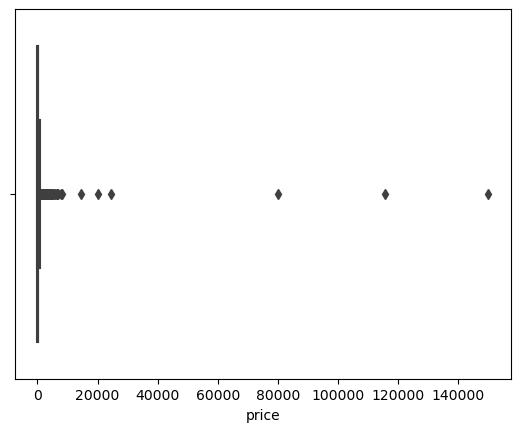

In [101]:
sns.boxplot(x='price',data=df)

<AxesSubplot:xlabel='percent_positive'>

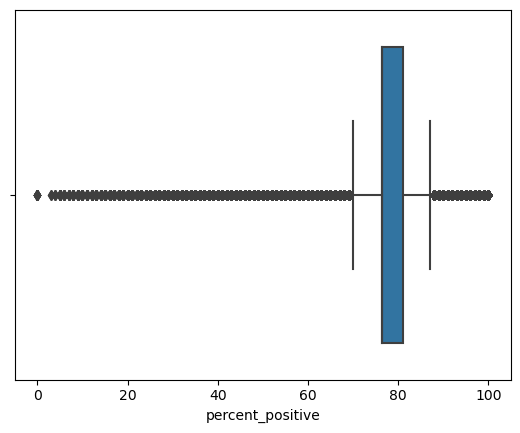

In [102]:
sns.boxplot(x='percent_positive',data=df)

<AxesSubplot:xlabel='reviews'>

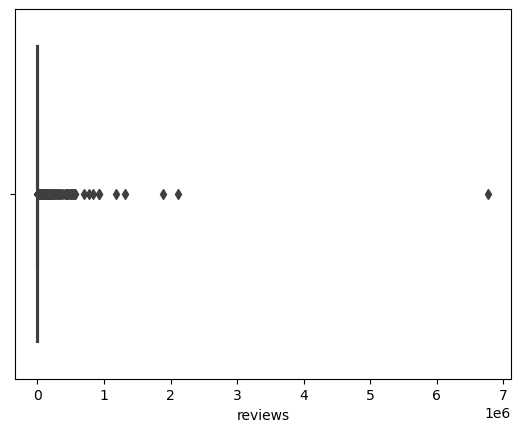

In [103]:
sns.boxplot(x='reviews',data=df)

In [104]:
idx=detect_outliers(df,0,['price','reviews','percent_positive'])

In [105]:
idx

[2,
 3,
 6,
 10,
 12,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 26,
 27,
 28,
 30,
 33,
 34,
 35,
 38,
 40,
 41,
 42,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 58,
 60,
 61,
 65,
 68,
 69,
 70,
 71,
 73,
 76,
 77,
 80,
 81,
 82,
 85,
 86,
 87,
 89,
 92,
 93,
 94,
 98,
 101,
 103,
 106,
 107,
 109,
 112,
 113,
 115,
 117,
 119,
 120,
 123,
 124,
 128,
 129,
 130,
 132,
 133,
 135,
 139,
 142,
 144,
 146,
 148,
 149,
 152,
 153,
 156,
 158,
 164,
 165,
 166,
 167,
 170,
 171,
 173,
 177,
 179,
 184,
 186,
 187,
 189,
 193,
 194,
 195,
 198,
 200,
 203,
 207,
 212,
 213,
 218,
 219,
 222,
 223,
 224,
 225,
 226,
 229,
 232,
 235,
 236,
 237,
 239,
 244,
 245,
 246,
 248,
 250,
 251,
 253,
 254,
 256,
 258,
 259,
 260,
 263,
 266,
 267,
 268,
 272,
 274,
 280,
 282,
 283,
 289,
 293,
 297,
 299,
 301,
 302,
 305,
 306,
 307,
 309,
 310,
 315,
 316,
 318,
 321,
 322,
 323,
 324,
 326,
 327,
 329,
 330,
 331,
 332,
 333,
 334,
 336,
 338,
 341,
 344,
 349,
 354,
 355,
 357,

# Analysis and Visualization

<AxesSubplot:>

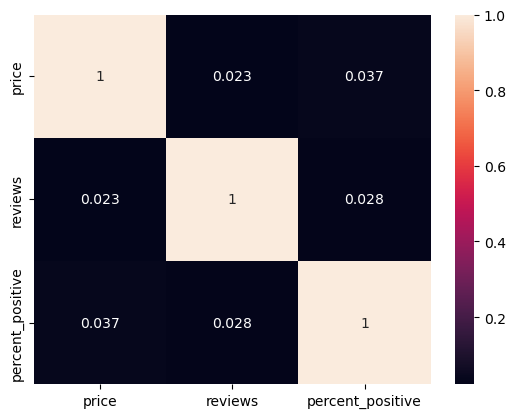

In [132]:
sns.heatmap(df.corr(),annot=True)

Questions 

1- What is the average price of all the games in the dataset?


In [106]:
print("Average price of all games : $", df['price'].mean())

Average price of all games : $ 232.99139608584454


2- What is the highest price of all the games in the dataset?


In [107]:
print("Highest price of all games: $", df['price'].max())

Highest price of all games: $ 150000.0


3- What is the most of the games are free or non-free games?


In [108]:
free_games = df[df['price'] == 0]
non_free_games = df[df['price'] != 0]

if len(free_games) > len(non_free_games):
    print("Most of the games are free games")
else:
    print("Most of the games are non-free games")

Most of the games are non-free games


4- What is the mediannumber of reviews for all the games in the dataset?

In [109]:
print("Median number of reviews for all games :", df['reviews'].median())

Median number of reviews for all games : 2296.1558200692043


5- What is the standard deviation of the prices for all the games in the dataset?

In [110]:
print("Standard deviation of prices for all games :", df['price'].std())

Standard deviation of prices for all games : 840.1331908046515


6- What is the highest game has a positive percentage review? 

In [111]:
print("Game with highest positive percentage review :", df['percent_positive'].max())

Game with highest positive percentage review : 100.0


7- What is the average number of genres per game in the dataset?

In [112]:
genres_per_game = df['genres'].apply(lambda x: len(x.split(',')))
avg_genres_per_game = genres_per_game.mean()
print("Average number of genres per game: ", avg_genres_per_game)

Average number of genres per game:  1.0


8- What is the correlation between the price and the number of reviews for the games?

In [113]:
corr_price_reviews = df['price'].corr(df['reviews'])
print("Correlation between price and number of reviews for games :\n", corr_price_reviews)

Correlation between price and number of reviews for games :
 0.02276898143392261


9- What is the lowest game has a positive percentage review?

In [114]:
print("Game with lowest positive percentage review :\n", df['percent_positive'].min())

Game with lowest positive percentage review :
 0.0


10- Are there any genres that tend to be priced higher than others?

In [115]:
mean_price_by_genre = df.groupby('genres')['price'].mean()
high_priced_genres = mean_price_by_genre[mean_price_by_genre == mean_price_by_genre.max()]
print("Genres with highest average price: \n", high_priced_genres)


Genres with highest average price: 
 genres
action;adventure;casual;massively multiplayer    3284.0
Name: price, dtype: float64


11- What is the average number of reviews for all the games in the dataset?

In [116]:
print("Average number of reviews for all games: ", df['reviews'].mean())

Average number of reviews for all games:  2296.155820070445


12- What is the average number of reviews for games with a positive percentage greater than 80%?

In [117]:
high_pos_reviews = df[df['percent_positive'] > 80]['reviews'].mean()
print("Average number of reviews for games with positive percentage greater than 80% :\n ", high_pos_reviews)

Average number of reviews for games with positive percentage greater than 80% :
  3708.9753106968487


13- What is the average price for games in an Action genre?

In [118]:
action_games = df[df['genres'].str.contains('Action')]
avg_price_action = action_games['price'].mean()
print("Average price for games in Action genre: ", avg_price_action)

Average price for games in Action genre:  nan


In [119]:
df

id                              title                        genres  \
0          0   Counter-strike: global offensive           action;free to play   
1          1                             Dota 2  action;free to play;strategy   
2          2         Warhammer 40,000: darktide                       Unknwon   
3          3  Call of duty®: modern warfare® ii                       Unknwon   
4          4                      Apex legends                       Unknwon   
...      ...                                ...                           ...   
71940  73339                   Pirate commander                       Unknwon   
71941  73340                       Fairy bubble                       Unknwon   
71942  73341                    Criminal russia                       Unknwon   
71943  73342                     Carmine impact                       Unknwon   
71944  73343              Artifice: war tactics                       Unknwon   

        price overall_review       reviews  percent_positive win_support  \
0         0.0       Positive  6.774812e+06         88.000000         Yes   
1         0.0       Positive  1.885261e+06         82.000000         Yes   
2      2199.0       Positive  2.609200e+04         72.000000         Yes   
3      4999.0          Mixed  2.159690e+05         64.000000         Yes   
4         0.0       Positive  5.392970e+05         85.000000         Yes   
...       ...            ...           ...               ...         ...   
71940     0.0       Positive  2.296156e+03         76.432111         Yes   
71941   219.0       Positive  2.296156e+03         76.432111         Yes   
71942     0.0       Positive  2.296156e+03         76.432111         Yes   
71943     0.0       Positive  2.296156e+03         76.432111         Yes   
71944     0.0       Positive  2.296156e+03         76.432111         Yes   

      mac_support lin_support  
0             Yes         Yes  
1             Yes         Yes  
2              No          No  
3              No          No  
4              No          No  
...           ...         ...  
71940          No          No  
71941          No          No  
71942          No         Yes  
71943          No          No  
71944          No          No  

[71944 rows x 10 columns]

14- What is the correlation between the number of genres and the price of the games?

In [120]:
corr_genres_price = df['genres'].apply(lambda x: len(x.split(','))).corr(df['price'])
print("Correlation between number of genres and price of games: ", corr_genres_price)

Correlation between number of genres and price of games:  nan


15- What is the least common genre among the games in the dataset?

In [121]:
least_common_genre = df['genres'].value_counts().idxmin()
print("Least common genre: ", least_common_genre)

Least common genre:  indie;massively multiplayer;rpg;simulation;strategy;early access


16-  What is the lowest genre have a positive percentage among the games in the dataset?

In [122]:
lowest_positive_genre = df[df['percent_positive'] == df['percent_positive'].min()]['genres'].iloc[0]
print("Genre with lowest positive percentage: ", lowest_positive_genre)

Genre with lowest positive percentage:  Unknwon


17- What is the most reviewed game in the dataset?

In [123]:
most_reviewed_game = df.sort_values('reviews', ascending=False).iloc[0]
print("Most reviewed game: \n", most_reviewed_game)

Most reviewed game: 
 id                                                 0
title               Counter-strike: global offensive
genres                           action;free to play
price                                            0.0
overall_review                              Positive
reviews                                    6774812.0
percent_positive                                88.0
win_support                                      Yes
mac_support                                      Yes
lin_support                                      Yes
Name: 0, dtype: object


18- How many games only support windows system ?

In [124]:
win_only_count = df["win_support"].value_counts()["Yes"]
print(f"There are {win_only_count} games that only support windows system.")

There are 71924 games that only support windows system.


19-How many games which  support window,Mac ,Lux ? 

In [125]:
win_only_count = df["win_support"].value_counts()["Yes"]
mac_only_count = df["mac_support"].value_counts()["Yes"]
lin_only_count = df["lin_support"].value_counts()["Yes"]
print(f"There are {win_only_count + mac_only_count + lin_only_count} games that support windows system ,Mac ,Lin.")

There are 98241 games that support windows system ,Mac ,Lin.


20- How many games have only positive overall_reviews?

In [126]:
positive_overall_reviews_count = df["overall_review"].value_counts()["Positive"]
print(f"There are {positive_overall_reviews_count} games that have only positive overall reviews.")

There are 61350 games that have only positive overall reviews.


21- show me the games which start with 'A' get a positive overall_reviews ?

In [127]:
games_startswith_A = df[(df["title"].str.startswith("A")) & (df["overall_review"]  == "Positive")]
print(games_startswith_A)

          id                                   title  \
4          4                           Apex legends   
42        42                American truck simulator   
57        57                   Ark: survival evolved   
80        80  Age of empires iv: anniversary edition   
90        90                           Assetto corsa   
...      ...                                     ...   
71889  73287                             Ardent seas   
71894  73292                       Airport renovator   
71912  73310                             Asterrunner   
71935  73334                            Annihilation   
71944  73343                   Artifice: war tactics   

                                                 genres   price  \
4                                               Unknwon     0.0   
42                                     indie;simulation   925.0   
57     action;adventure;indie;massively multiplayer;rpg   529.0   
80                                              Unknwon  12

22- show me the games which start with 'A' get a percent_positive more 
then 50%  ?


In [128]:
games_startwith_A = df[(df["title"].str.startswith("A")) & (df["percent_positive"] > 50.0 )]
print(games_startwith_A)

          id                                   title  \
4          4                           Apex legends   
42        42                American truck simulator   
57        57                   Ark: survival evolved   
80        80  Age of empires iv: anniversary edition   
90        90                           Assetto corsa   
...      ...                                     ...   
71889  73287                             Ardent seas   
71894  73292                       Airport renovator   
71912  73310                             Asterrunner   
71935  73334                            Annihilation   
71944  73343                   Artifice: war tactics   

                                                 genres   price  \
4                                               Unknwon     0.0   
42                                     indie;simulation   925.0   
57     action;adventure;indie;massively multiplayer;rpg   529.0   
80                                              Unknwon  12

In [129]:
#df.to_csv('Games_Data_last_update.csv', index=False)